In [1]:
# Script to implement the code to go through each demonstration and plot the showmap for each
# task

In [16]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import os


from tactile_learning.tactile_data import TactileImage
from tactile_learning.utils import load_data

In [21]:

def plot_tactile_sensor(ax, sensor_values, use_img=False, img=None, title='Tip Position'):
    # sensor_values: (16, 3) - 3 values for each tactile - x and y represents the position, z represents the pressure on the tactile point
    img_shape = (240, 240, 3) # For one sensor
    blank_image = np.ones(img_shape, np.uint8) * 255
    if use_img == False: 
        img = ax.imshow(blank_image.copy())
    if not title is None:
        ax.set_title(title)

    # Set the coordinates for each circle
    tactile_coordinates = []
    for j in range(48, 192+1, 48): # Y
        for i in range(48, 192+1, 48): # X - It goes from top left to bottom right row first 
            tactile_coordinates.append([i,j])

    # Plot the circles 
    for i in range(sensor_values.shape[0]):
        center_coordinates = (
            tactile_coordinates[i][0] + int(sensor_values[i,0]/20), # NOTE: Change this
            tactile_coordinates[i][1] + int(sensor_values[i,1]/20)
        )
        radius = max(2 + int(sensor_values[i,2]/5), 1)
      
        if i == 0:
            frame_axis = cv2.circle(blank_image.copy(), center_coordinates, radius, color=(0,255,0), thickness=-1)
        else:
            frame_axis = cv2.circle(frame_axis.copy(), center_coordinates, radius, color=(0,255,0), thickness=-1)

    img.set_array(frame_axis)

    return img, frame_axis


# Sponge Flipping

In [22]:
# Load the data for a demonstration
SPONGE_FLIPPING_PATH = '/home/irmak/Workspace/Holo-Bot/extracted_data/card_flipping'
roots = glob.glob(f'{SPONGE_FLIPPING_PATH}/demonstration_*')
roots = sorted(roots)
data = load_data(
    roots = roots,
    demos_to_use = [24]
)
tactile_data = data['tactile']

torch.Size([3, 16, 16])


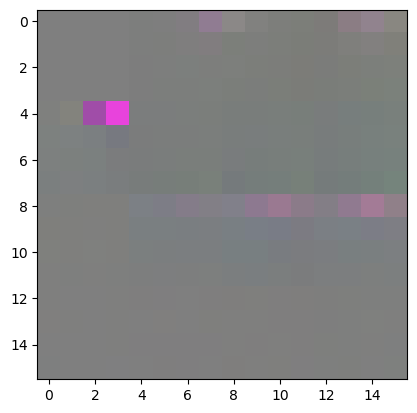

In [38]:


tactile_img = TactileImage(tactile_image_size=16)
TACTILE_ID = 1532
tactile_values = tactile_data['values'][0][TACTILE_ID]
img = tactile_img.get('whole_hand', tactile_values)
print(img.shape)
plt.imshow(np.transpose(img, (1,2,0)))

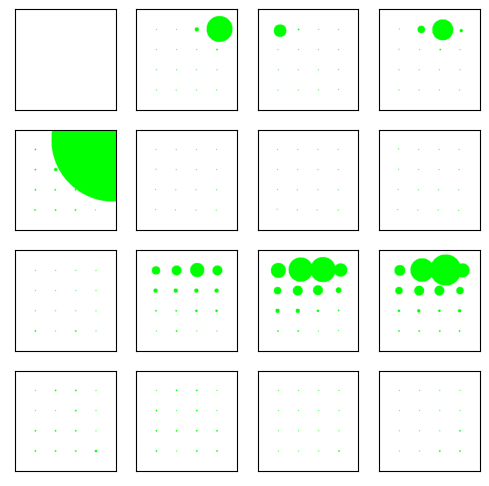

In [39]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(6,6))
for col_id in range(4):
    for row_id in range(4):
        if col_id + row_id > 0:
            plot_tactile_sensor(
                ax = axs[row_id, col_id],
                sensor_values = tactile_values[col_id*4+row_id-1],
                title=None
            )
        axs[row_id, col_id].get_yaxis().set_ticks([])
        axs[row_id, col_id].get_xaxis().set_ticks([])

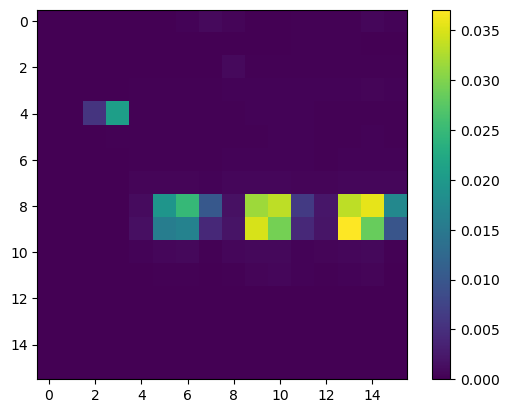

In [25]:
# Concatenate all tactile images - this is a more proper way to calculate variances
tactile_imgs = []
for tactile_value in tactile_data['values'][0]:
    tactile_imgs.append(
        tactile_img.get('whole_hand', tactile_value)
    )
tactile_imgs = np.stack(tactile_imgs, axis=0)
tactile_var = np.var(tactile_imgs, axis=0)
plt.imshow(np.sum(tactile_var, axis=0))
plt.colorbar()

# Bowl Unstacking

In [140]:
BOWL_UNSTACKING_PATH = '/home/irmak/Workspace/Holo-Bot/extracted_data/bowl_picking'
roots = glob.glob(f'{BOWL_UNSTACKING_PATH}/demonstration_*')
roots = sorted(roots)
data = load_data(
    roots = roots,
    demos_to_use = []
)
tactile_data = data['tactile']

torch.Size([3, 16, 16])


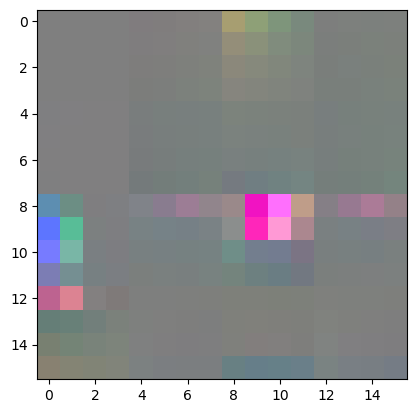

In [141]:
tactile_img = TactileImage(tactile_image_size=16)
TACTILE_ID = 2000
tactile_values = tactile_data['values'][1][TACTILE_ID]
img = tactile_img.get('whole_hand', tactile_values)
print(img.shape)
plt.imshow(np.transpose(img, (1,2,0)))

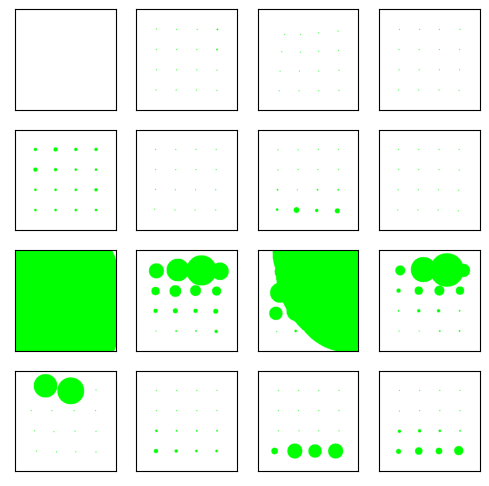

In [142]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(6,6))
for col_id in range(4):
    for row_id in range(4):
        if col_id + row_id > 0:
            plot_tactile_sensor(
                ax = axs[row_id, col_id],
                sensor_values = tactile_values[col_id*4+row_id-1],
                title=None
            )
        axs[row_id, col_id].get_yaxis().set_ticks([])
        axs[row_id, col_id].get_xaxis().set_ticks([])

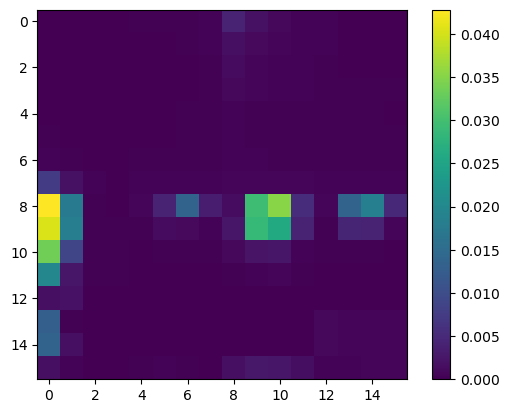

In [143]:
tactile_imgs = []
for key in tactile_data['values'].keys():
    for tactile_value in tactile_data['values'][key]:
        tactile_imgs.append(
            tactile_img.get('whole_hand', tactile_value)
        )

tactile_imgs = np.stack(tactile_imgs, axis=0)
tactile_var = np.var(tactile_imgs, axis=0)
plt.imshow(np.sum(tactile_var, axis=0))
plt.colorbar()

# Eraser Turning


In [53]:
ERASER_TURNING_PATH = '/home/irmak/Workspace/Holo-Bot/extracted_data/card_turning'
roots = glob.glob(f'{ERASER_TURNING_PATH}/demonstration_*')
roots = sorted(roots)
data = load_data(
    roots = roots,
    demos_to_use = [16]
)
tactile_data = data['tactile']

torch.Size([3, 16, 16])


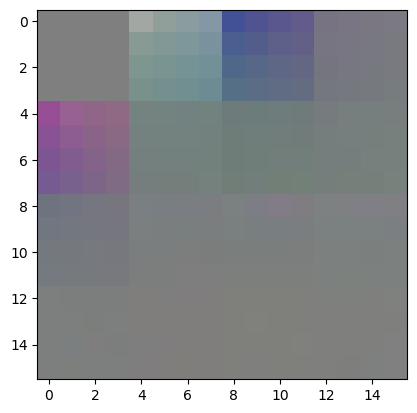

In [54]:
tactile_img = TactileImage(tactile_image_size=16)
TACTILE_ID = 2000
tactile_values = tactile_data['values'][1][TACTILE_ID]
img = tactile_img.get('whole_hand', tactile_values)
print(img.shape)
plt.imshow(np.transpose(img, (1,2,0)))




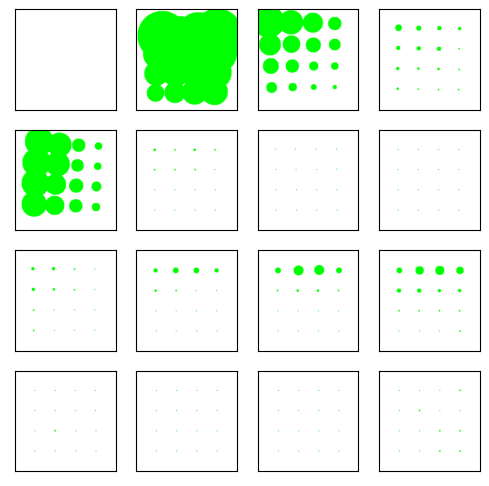

In [55]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(6,6))
for col_id in range(4):
    for row_id in range(4):
        if col_id + row_id > 0:
            plot_tactile_sensor(
                ax = axs[row_id, col_id],
                sensor_values = tactile_values[col_id*4+row_id-1],
                title=None
            )
        axs[row_id, col_id].get_yaxis().set_ticks([])
        axs[row_id, col_id].get_xaxis().set_ticks([])

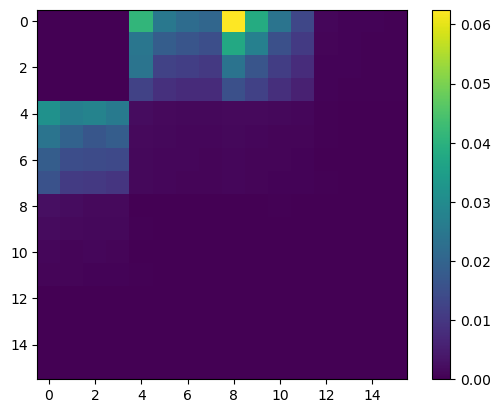

In [56]:
# Concatenate all tactile images - this is a more proper way to calculate variances
tactile_imgs = []
for tactile_value in tactile_data['values'][1]:
    tactile_imgs.append(
        tactile_img.get('whole_hand', tactile_value)
    )
tactile_imgs = np.stack(tactile_imgs, axis=0)
tactile_var = np.var(tactile_imgs, axis=0)
plt.imshow(np.sum(tactile_var, axis=0))
plt.colorbar()

# Peg Insertion

In [58]:
PEG_INSERTION_PATH = '/home/irmak/Workspace/Holo-Bot/extracted_data/peg_insertion'
roots = glob.glob(f'{PEG_INSERTION_PATH}/demonstration_*')
roots = sorted(roots)
data = load_data(
    roots = roots,
    demos_to_use = [4]
)
tactile_data = data['tactile']

torch.Size([3, 16, 16])


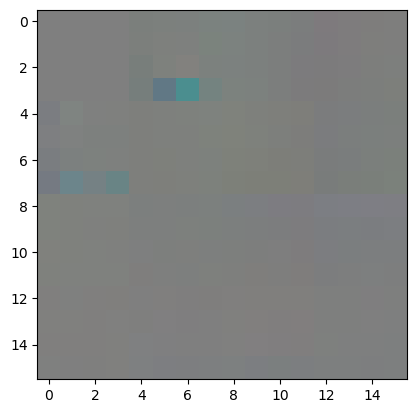

In [74]:
tactile_img = TactileImage(tactile_image_size=16)
TACTILE_ID = 1630
tactile_values = tactile_data['values'][3][TACTILE_ID]
img = tactile_img.get('whole_hand', tactile_values)
print(img.shape)
plt.imshow(np.transpose(img, (1,2,0)))

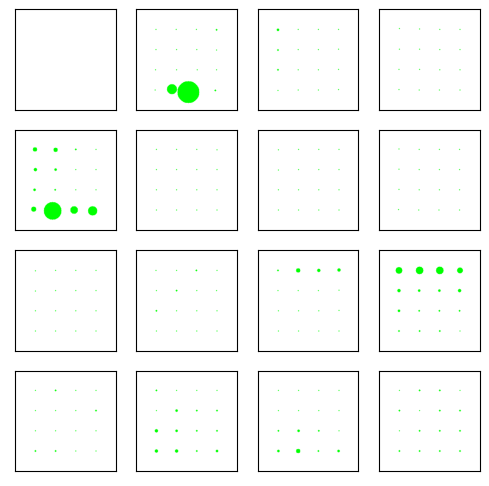

In [75]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(6,6))
for col_id in range(4):
    for row_id in range(4):
        if col_id + row_id > 0:
            plot_tactile_sensor(
                ax = axs[row_id, col_id],
                sensor_values = tactile_values[col_id*4+row_id-1],
                title=None
            )
        axs[row_id, col_id].get_yaxis().set_ticks([])
        axs[row_id, col_id].get_xaxis().set_ticks([])

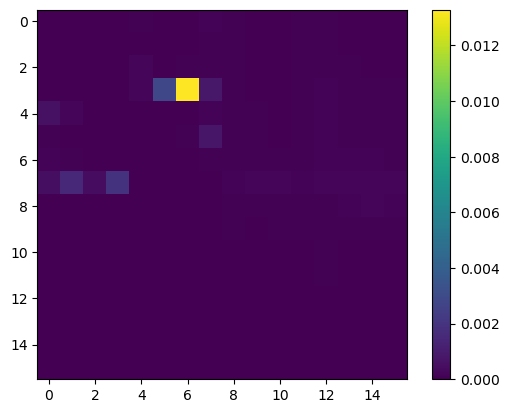

In [77]:
# Concatenate all tactile images - this is a more proper way to calculate variances
tactile_imgs = []
for tactile_value in tactile_data['values'][3]:
    tactile_imgs.append(
        tactile_img.get('whole_hand', tactile_value)
    )
tactile_imgs = np.stack(tactile_imgs, axis=0)
tactile_var = np.var(tactile_imgs, axis=0)
plt.imshow(np.sum(tactile_var, axis=0))
plt.colorbar()

# Plier Picking

In [80]:
PLIER_PICKING_PATH = '/home/irmak/Workspace/Holo-Bot/extracted_data/plier_picking'
roots = glob.glob(f'{PLIER_PICKING_PATH}/demonstration_*')
roots = sorted(roots)
data = load_data(
    roots = roots,
    demos_to_use = [15]
)
tactile_data = data['tactile']

torch.Size([3, 16, 16])


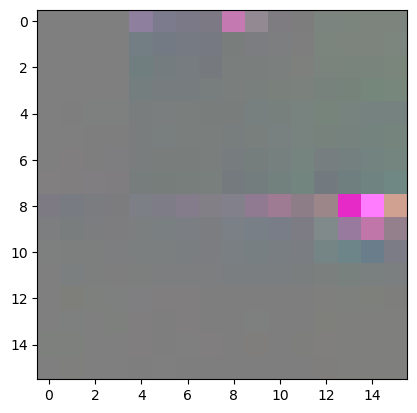

In [93]:
tactile_img = TactileImage(tactile_image_size=16)
TACTILE_ID = 1940
tactile_values = tactile_data['values'][1][TACTILE_ID]
img = tactile_img.get('whole_hand', tactile_values)
print(img.shape)
plt.imshow(np.transpose(img, (1,2,0)))

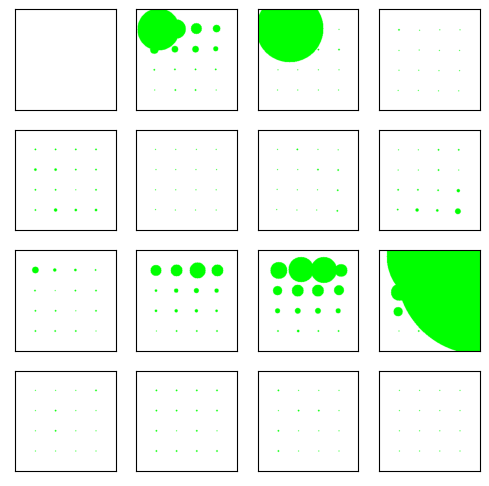

In [94]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(6,6))
for col_id in range(4):
    for row_id in range(4):
        if col_id + row_id > 0:
            plot_tactile_sensor(
                ax = axs[row_id, col_id],
                sensor_values = tactile_values[col_id*4+row_id-1],
                title=None
            )
        axs[row_id, col_id].get_yaxis().set_ticks([])
        axs[row_id, col_id].get_xaxis().set_ticks([])

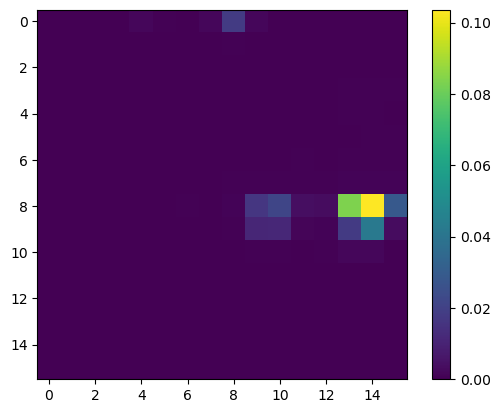

In [95]:
# Concatenate all tactile images - this is a more proper way to calculate variances
tactile_imgs = []
for tactile_value in tactile_data['values'][1]:
    tactile_imgs.append(
        tactile_img.get('whole_hand', tactile_value)
    )
tactile_imgs = np.stack(tactile_imgs, axis=0)
tactile_var = np.var(tactile_imgs, axis=0)
plt.imshow(np.sum(tactile_var, axis=0))
plt.colorbar()

# Book Opening

In [136]:
PATH = '/data/tactile_dexterity/evaluation/book_opening'
roots = glob.glob(f'{PATH}/demonstration_*')
roots = sorted(roots)
data = load_data(
    roots = roots,
    demos_to_use = []
)
tactile_data = data['tactile']

torch.Size([3, 16, 16])


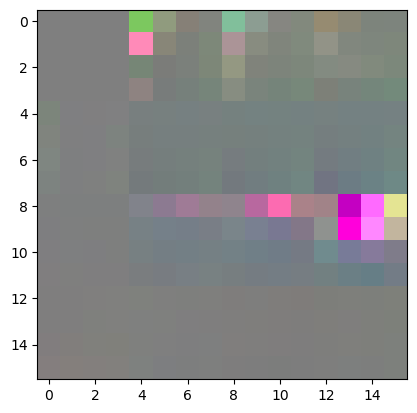

In [137]:
tactile_img = TactileImage(tactile_image_size=16)
TACTILE_ID = 4500
tactile_values = tactile_data['values'][3][TACTILE_ID]
img = tactile_img.get('whole_hand', tactile_values)
print(img.shape)
plt.imshow(np.transpose(img, (1,2,0)))

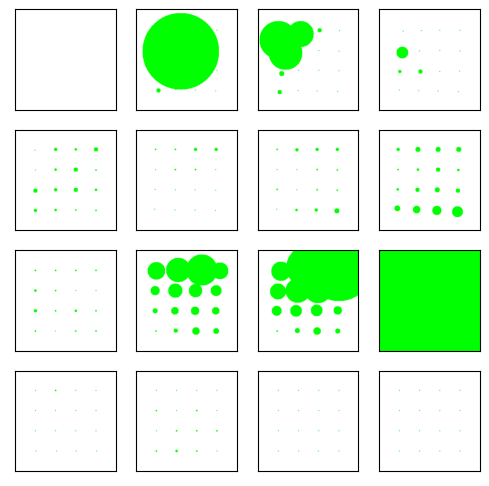

In [138]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(6,6))
for col_id in range(4):
    for row_id in range(4):
        if col_id + row_id > 0:
            plot_tactile_sensor(
                ax = axs[row_id, col_id],
                sensor_values = tactile_values[col_id*4+row_id-1],
                title=None
            )
        axs[row_id, col_id].get_yaxis().set_ticks([])
        axs[row_id, col_id].get_xaxis().set_ticks([])

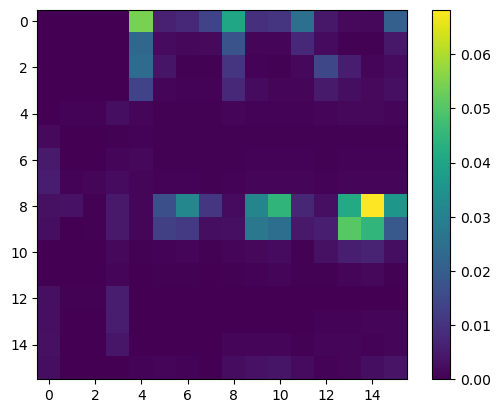

In [139]:
tactile_imgs = []
for key in tactile_data['values'].keys():
    for tactile_value in tactile_data['values'][key]:
        tactile_imgs.append(
            tactile_img.get('whole_hand', tactile_value)
        )

tactile_imgs = np.stack(tactile_imgs, axis=0)
tactile_var = np.var(tactile_imgs, axis=0)
plt.imshow(np.sum(tactile_var, axis=0))
plt.colorbar()

# Joystick Movement

In [124]:
PATH = '/data/tactile_dexterity/evaluation/joystick_movement'
roots = glob.glob(f'{PATH}/demonstration_*')
roots = sorted(roots)
data = load_data(
    roots = roots,
    demos_to_use = []
)
tactile_data = data['tactile']

torch.Size([3, 16, 16])


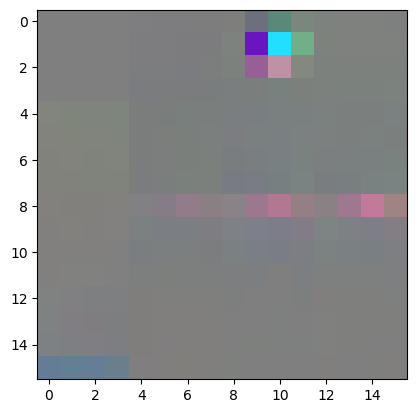

In [133]:
tactile_img = TactileImage(tactile_image_size=16)
TACTILE_ID = 1000
tactile_values = tactile_data['values'][2][TACTILE_ID]
img = tactile_img.get('whole_hand', tactile_values)
print(img.shape)
plt.imshow(np.transpose(img, (1,2,0)))

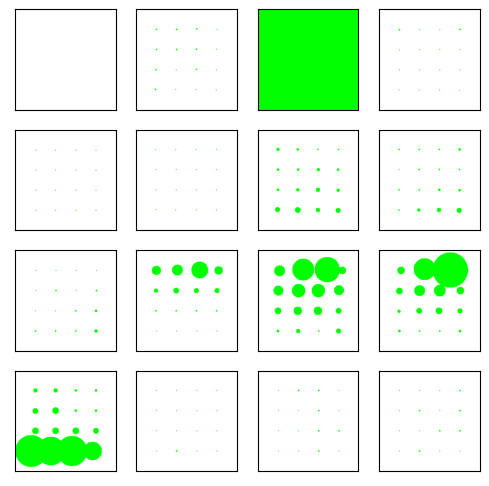

In [134]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(6,6))
for col_id in range(4):
    for row_id in range(4):
        if col_id + row_id > 0:
            plot_tactile_sensor(
                ax = axs[row_id, col_id],
                sensor_values = tactile_values[col_id*4+row_id-1],
                title=None
            )
        axs[row_id, col_id].get_yaxis().set_ticks([])
        axs[row_id, col_id].get_xaxis().set_ticks([])

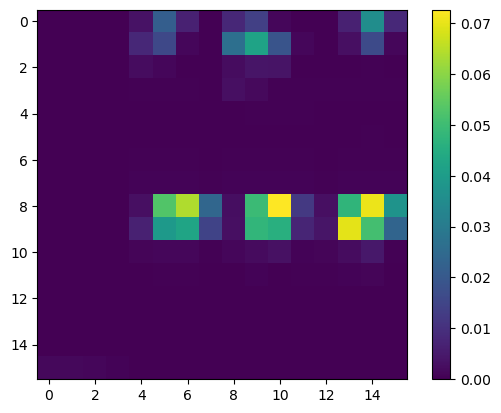

In [132]:
tactile_imgs = []
for key in tactile_data['values'].keys():
    for tactile_value in tactile_data['values'][key]:
        tactile_imgs.append(
            tactile_img.get('whole_hand', tactile_value)
        )

tactile_imgs = np.stack(tactile_imgs, axis=0)
tactile_var = np.var(tactile_imgs, axis=0)
plt.imshow(np.sum(tactile_var, axis=0))
plt.colorbar()

# Bottle Cap Opening

In [144]:
PATH = '/data/tactile_dexterity/evaluation/bottle_cap_opening'
roots = glob.glob(f'{PATH}/demonstration_*')
roots = sorted(roots)
data = load_data(
    roots = roots,
    demos_to_use = []
)
tactile_data = data['tactile']

torch.Size([3, 16, 16])


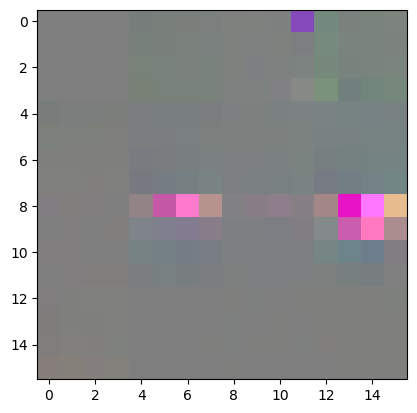

In [149]:
tactile_img = TactileImage(tactile_image_size=16)
TACTILE_ID = 2100
tactile_values = tactile_data['values'][5][TACTILE_ID]
img = tactile_img.get('whole_hand', tactile_values)
print(img.shape)
plt.imshow(np.transpose(img, (1,2,0)))

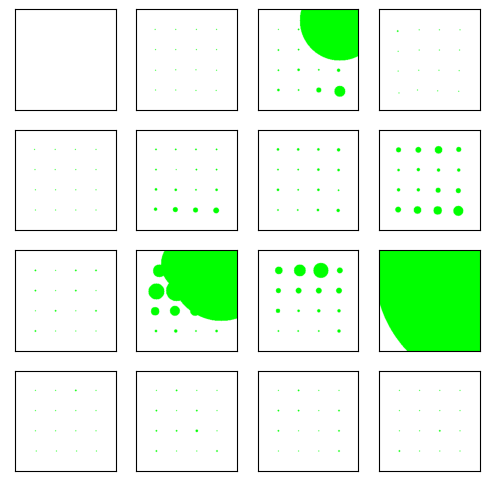

In [150]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(6,6))
for col_id in range(4):
    for row_id in range(4):
        if col_id + row_id > 0:
            plot_tactile_sensor(
                ax = axs[row_id, col_id],
                sensor_values = tactile_values[col_id*4+row_id-1],
                title=None
            )
        axs[row_id, col_id].get_yaxis().set_ticks([])
        axs[row_id, col_id].get_xaxis().set_ticks([])

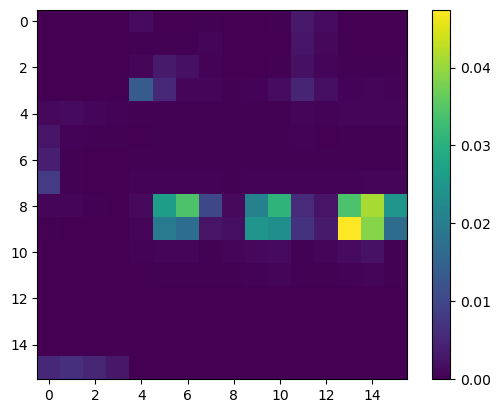

In [151]:
tactile_imgs = []
for key in tactile_data['values'].keys():
    for tactile_value in tactile_data['values'][key]:
        tactile_imgs.append(
            tactile_img.get('whole_hand', tactile_value)
        )

tactile_imgs = np.stack(tactile_imgs, axis=0)
tactile_var = np.var(tactile_imgs, axis=0)
plt.imshow(np.sum(tactile_var, axis=0))
plt.colorbar()

# Cup Unstacking 

In [152]:
PATH = '/data/tactile_dexterity/evaluation/cup_unstacking'
roots = glob.glob(f'{PATH}/demonstration_*')
roots = sorted(roots)
data = load_data(
    roots = roots,
    demos_to_use = []
)
tactile_data = data['tactile']

torch.Size([3, 16, 16])


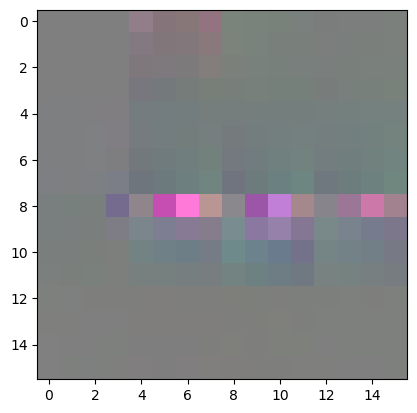

In [160]:
tactile_img = TactileImage(tactile_image_size=16)
TACTILE_ID = 5100
tactile_values = tactile_data['values'][5][TACTILE_ID]
img = tactile_img.get('whole_hand', tactile_values)
print(img.shape)
plt.imshow(np.transpose(img, (1,2,0)))

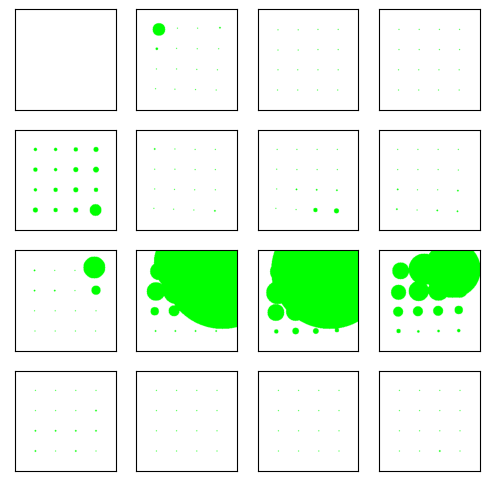

In [161]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(6,6))
for col_id in range(4):
    for row_id in range(4):
        if col_id + row_id > 0:
            plot_tactile_sensor(
                ax = axs[row_id, col_id],
                sensor_values = tactile_values[col_id*4+row_id-1],
                title=None
            )
        axs[row_id, col_id].get_yaxis().set_ticks([])
        axs[row_id, col_id].get_xaxis().set_ticks([])

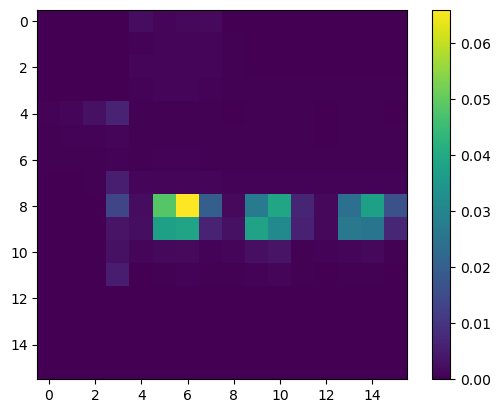

In [162]:
tactile_imgs = []
for key in tactile_data['values'].keys():
    for tactile_value in tactile_data['values'][key]:
        tactile_imgs.append(
            tactile_img.get('whole_hand', tactile_value)
        )

tactile_imgs = np.stack(tactile_imgs, axis=0)
tactile_var = np.var(tactile_imgs, axis=0)
plt.imshow(np.sum(tactile_var, axis=0))
plt.colorbar()